In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Set up functions

In [15]:
train_pts = (np.pi/10) * np.linspace(0, 5, 6)
g = lambda x : 1 - np.cos(x)
relu = lambda x : np.maximum(x, 0)
relup = lambda x : np.where(x <= 0, 0, 1)
f = lambda a, b : ((relu(a*train_pts - b) - g(train_pts))**2).sum()/12

def gradf(a, b):
    out = np.zeros((2,))
    out[0] = (1/6)*sum((relu(a*train_pts - b) - g(train_pts))*relup(a*train_pts - b)*train_pts)
    out[1] =-(1/6)*sum((relu(a*train_pts - b) - g(train_pts))*relup(a*train_pts - b)*train_pts)
    return out

def hessf(a, b):
    out = np.zeros((2, 2))
    relup2 = relup(a*train_pts - b)**2
    out[0, 0] = (train_pts**2*relup2).sum()
    out[0, 1] = out[1, 0] = -(train_pts*relup2).sum()
    out[1, 1] = relup2.sum()
    return out/6

## Part 1

In [16]:
# get grad vals and f vals
a = b = np.linspace(-5, 5)
AA, BB = np.meshgrid(a, b)
f_vals = np.zeros((a.shape[0], b.shape[0]))
grad_vals = np.zeros((a.shape[0], b.shape[0], 2))
for i in range(grad_vals.shape[0]):
    for j in range(grad_vals.shape[1]):
        f_vals[i, j] = f(AA[i, j], BB[i, j])
        grad_vals[i, j, :] = gradf(AA[i, j], BB[i, j])

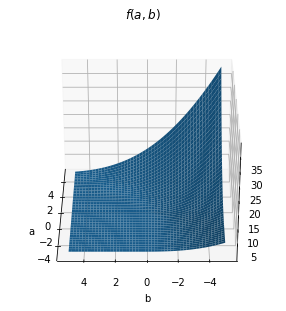

In [17]:
ax = plt.figure(figsize=(5,5)).add_subplot(111, projection='3d')
ax.plot_surface(AA, BB, f_vals)
ax.set_xlabel('a'); ax.set_ylabel('b')
ax.view_init(azim=180)
plt.title(r'$f(a,b)$')
plt.savefig('../pics/loss_surface.png')
plt.show()

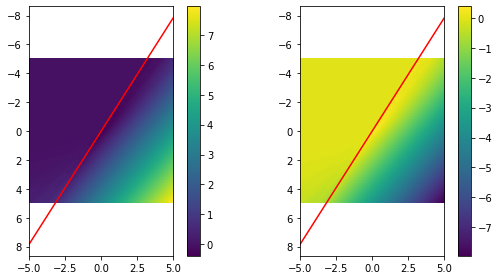

In [33]:
_, (ax1, ax2) = plt.subplots(figsize=(8, 4), ncols=2)
c1 = ax1.imshow(grad_vals[:, :, 0], extent=[-5,5,-5,5])
ax1.plot(a, -(np.pi/2)*a, 'r')
ax1.invert_yaxis()
plt.colorbar(c1, ax=ax1)
c2 = ax2.imshow(grad_vals[:, :, 1], extent=[-5,5,-5,5])
ax2.plot(a, -(np.pi/2)*a, 'r')
ax2.invert_yaxis()
plt.colorbar(c2, ax=ax2)
plt.tight_layout()
plt.show()

In [228]:
idx = f_vals.argmin()
(AA.flatten()[idx], BB.flatten()[idx])

(0.9183673469387754, 0.5102040816326534)

In [13]:
tol = 1e-10
zidxs = np.logical_and(abs(grad_vals[:, :, 0]) < tol, abs(grad_vals[:, :, 1]) < tol)
plt.imshow(zidxs)
plt.gca().invert_yaxis()
plt.show()

NameError: name 'grad_vals' is not defined

In [286]:
BB[zidxs].min()/np.pi

-0.4872090094649858

In [6]:
# Find where Hessian is negative and positive definite
a = b = np.linspace(-5, 5)
AA, BB = np.meshgrid(a, b)
hess_vals = np.zeros((a.shape[0], b.shape[0], 2))
for i in range(hess_vals.shape[0]):
    for j in range(hess_vals.shape[1]):
        hess_vals[i, j, :] = np.linalg.eig(hessf(AA[i, j], BB[i, j]))[0]

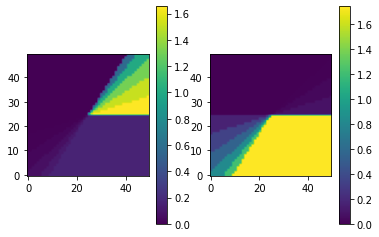

In [12]:
_, (ax1, ax2) = plt.subplots(ncols=2)
c1 = ax1.imshow(hess_vals[:,:,0])
ax1.invert_yaxis()
plt.colorbar(c1, ax=ax1)
c2 = ax2.imshow(hess_vals[:,:,1])
ax2.invert_yaxis()
plt.colorbar(c2, ax=ax2)
plt.show()

## Part 2

## Part 3

In [296]:
def SGD(x0, gfun, schedule='recip'):
    # Stochastic gradient descent function with batch size 1
    # Input: x0   = initial guess
    #        gfun = gradient of function accepting index to report at

    xp = x0
    n = train_pts.shape[0]
    maxiter = 200

    # Set stepsize reduction strategy
    if schedule == 'recip':
        alpha = [1/(iter + 1) for iter in range(maxiter)]
    elif schedule == 'power':
        alpha = [2**(-iter-1) for iter in range(maxiter)]
    else: raise RuntimeError('unimplemented scheduler')

    for iter in range(maxiter):
        idx = np.random.randint(0, n)  # generate random batch
        gp = gfun(xp, I=idx)
        x = xp - alpha[iter]*gp
    
    return x

# Define new function and gradient function
def f(p):
    a = p[0]; b = p[1]
    return sum((relu(a*train_pts - b) - g(train_pts))**2)/12

def gfun(p, I=None):
    a = p[0]; b = p[1]; 
    x = train_pts[I] if I is not None else train_pts
    return np.array([((relu(a*x - b) - g(x))*relup(a*x - b)*x).sum()/6,
                     -((relu(a*x - b) - g(x))*relup(a*x - b)).sum()/6])

In [297]:
from scipy.optimize import minimize
minimize(f, np.array([1, 0]), jac = lambda x : gfun(x)).x

array([0.86131338, 0.37351492])

In [299]:
SGD(np.array([1, 0]), gfun, 'power')

array([1.00000000e+00, 4.53590942e-62])